Finding the optimum breaks/splits for different sizes of bins for the metric variable "Salary" in reference to the binary variable "Clicked" such that the association measure CramerV is maximised.

    In part 2:
    HyperOpt and fmin are used to find the maxmimum CramerV-assiociation measure for 2, 3, 4, 5,
    10, 20, 50 and 100 splits. The splits should range between 1K and 100K in 1K-steps.
        
    In part 3:
    For each split and their optimum solution (according the solver), the Chi-Square-Test is
    computed and the categorized "Salary"-variable is visualized.
    
    In part 4:
    The total cycle is evaluated with two breaks/splits to find the true global optimum.
    That output is be compared to the Solver solution.

# Imports & read data

In [2]:
%matplotlib inline
import sys
sys.path.insert(0, 'lib\\')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special
import warnings
warnings.simplefilter("ignore")
import Analyser
import researchpy as rp
from hyperopt import hp
from hyperopt import rand, tpe
from hyperopt import Trials
from hyperopt import fmin

## Read data

In [3]:
df = pd.read_csv('data\\Facebook_Ads.csv', encoding='ISO-8859-1')

# Create and set-up Solver solution
Firstly, define space, a dictionary with the desired splits and their uniform distribution for searching. 
Secondly, define objective-function, which bins the metric variable "salary" according the number of splits. 
Thirdly, apply the solver for the different splits/breaks/bins to find the maximum correlation (CramerV) between the 'Clicked' and previous binned 'Salary_categorized' variable. 

In [4]:
# Set up a dictionary for the binning. Each element defines a split with their distribution.
# Input: Number of splits, the search range and the steps for search range.
def get_space(p_breaks, p_min, p_max, p_steps): 
    dicts = {}
    keys = range(p_breaks)
    for i in keys:
        dicts[i] = (hp.quniform(str(i), p_min, p_max, p_steps))
    return dicts

# objective-function -> MIN ! 
# Salary variable is binned according the input space (the split values)
# CramerV value (for Clicked and Salary_categorized) is picked up (negative) to minimize.
def objectiveX(space):
    temp = df
    spaceList = []
    spaceList = [int(space[i]) for i in range(0, len(space))]
    bins = spaceList
    bins.sort()
    group_names = [i for i in range(0, len(bins) - 1)]
    temp['Salary_cat'] = np.digitize(temp['Salary'], bins)
    results = np.array(rp.crosstab(temp['Clicked'], temp['Salary_cat'], test= 'chi-square')[1])[2][1]
    del bins
    return -results

In [6]:
# Set-up the algorithms and define the number of desired breaks
tpe_algo              = tpe.suggest
rand_algo             = rand.suggest
tpe_best_container    = []
tpe_trials_conatiner  = []
breaks                = [1,2,3,4,5,10,20,50]

for i in breaks:
    print(i, ' Breaking points considered')
    
    space = get_space(i, 1000, 100000, 1000)
    tpe_trials  = Trials()
    #rand_trials = Trials()
    tpe_trials_conatiner.append(tpe_trials)
    
    tpe_best = fmin(fn=objectiveX, 
                    space=space, 
                    algo=tpe_algo,       # rand_algo    --- search algorithms
                    trials=tpe_trials,   # rand_trials  --- trial DB
                    max_evals=1000, 
                    #rstate= np.random.RandomState(50)
                   )
    
    tpe_best_container.append(tpe_best)

1  Breaking points considered
100%|██████████| 1000/1000 [03:45<00:00,  3.52trial/s, best loss: -0.6455]
2  Breaking points considered
100%|██████████| 1000/1000 [04:47<00:00,  2.37trial/s, best loss: -0.6812]
3  Breaking points considered
100%|██████████| 1000/1000 [06:12<00:00,  1.72trial/s, best loss: -0.6894]
4  Breaking points considered
100%|██████████| 1000/1000 [07:34<00:00,  1.32trial/s, best loss: -0.6909]
5  Breaking points considered
100%|██████████| 1000/1000 [09:17<00:00,  1.10trial/s, best loss: -0.6924]
10  Breaking points considered
100%|██████████| 1000/1000 [16:10<00:00,  1.68s/trial, best loss: -0.6975]
20  Breaking points considered
100%|██████████| 1000/1000 [30:29<00:00,  3.25s/trial, best loss: -0.7025]
50  Breaking points considered
100%|██████████| 1000/1000 [1:13:05<00:00,  8.06s/trial, best loss: -0.7119]


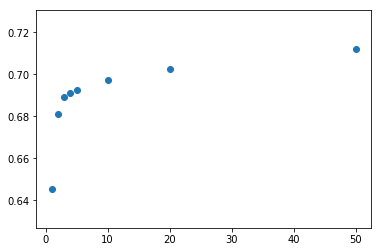

In [7]:
CramerVs = [-tpe_trials_conatiner[i].best_trial['result']['loss'] for i in range(0, len(breaks))]
plt.scatter(breaks,CramerVs)
plt.show()

Ran for each number of breaks [1,2,3,4,5,10,20,50] 1000 trials to maximise the correlation metric CramerV and in finding the optimum breaks in discretizing/binning the 'Salary'-variable.
Note: the number of bins is determined by simply 'number of breaks + 1'. 
With number of breaks the correlation metric CramerV increased diminishing.

# Chi-square-test and CramerV for the different solver-solutions
The split for the different number of breaks becomes more and more a visual "V" in the bar-chart with having one category on the one side and the other category on the opposite side.  

In [9]:
myAnalyser = Analyser.Analyser()

## Categorising with 1 break having 2 bins

Splitting at: [51000]


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,207.9290
1,p-value =,0.0000
2,Cramer's phi =,0.6455


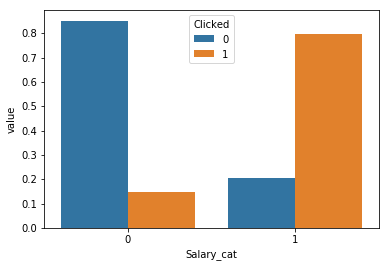

In [10]:
bins = [int(tpe_best_container[0][str(i)]) for i in range(0, breaks[0])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

## Categorising with 2 breaks having 3 bins

Splitting at: [51000, 63000]


,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,231.5395
1,p-value =,0.0000
2,Cramer's V =,0.6812


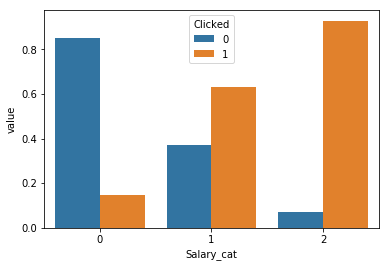

In [12]:
bins = [int(tpe_best_container[1][str(i)]) for i in range(0, breaks[1])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

## Categorising having 3 breaks 4 bins

Splitting at: [41000, 51000, 63000]


,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,237.1739
1,p-value =,0.0000
2,Cramer's V =,0.6894


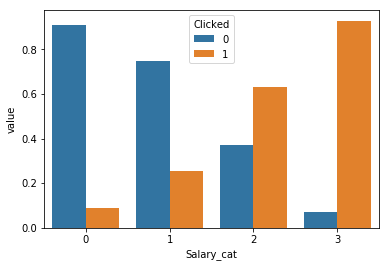

In [13]:
bins = [int(tpe_best_container[2][str(i)]) for i in range(0, breaks[2])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

## Categorising having 4 breaks 5 bins

Splitting at: [43000, 51000, 58000, 63000]


,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,238.2114
1,p-value =,0.0000
2,Cramer's V =,0.6909


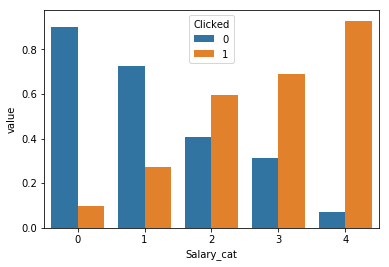

In [15]:
bins = [int(tpe_best_container[3][str(i)]) for i in range(0, breaks[3])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

## Categorising having 5 breaks 6 bins

Splitting at: [31000, 43000, 51000, 61000, 69000]


,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,239.2498
1,p-value =,0.0000
2,Cramer's V =,0.6924


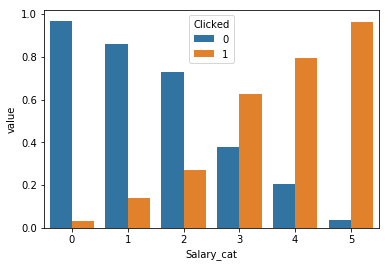

In [16]:
bins = [int(tpe_best_container[4][str(i)]) for i in range(0, breaks[4])]
bins.sort()
print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])[16]

## Categorising having 10 breaks 11 bins

,Chi-square test,results
0,Pearson Chi-square ( 10.0) =,242.7668
1,p-value =,0.0000
2,Cramer's V =,0.6975


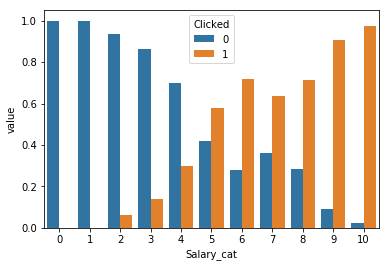

In [18]:
bins = [int(tpe_best_container[5][str(i)]) for i in range(0, breaks[5])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],11)[16]

## Categorising having 20 breaks 21 bins

,Chi-square test,results
0,Pearson Chi-square ( 19.0) =,246.2365
1,p-value =,0.0000
2,Cramer's V =,0.7025


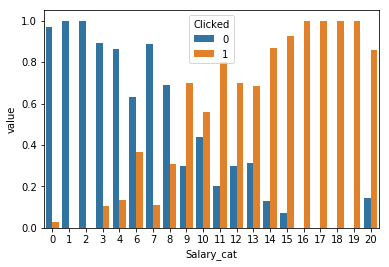

In [19]:
bins = [int(tpe_best_container[6][str(i)]) for i in range(0, breaks[6])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],21)[16]

## Categorising having 50 breaks 51 bins

,Chi-square test,results
0,Pearson Chi-square ( 37.0) =,252.8758
1,p-value =,0.0000
2,Cramer's V =,0.7119


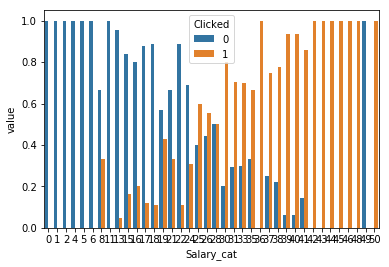

In [20]:
bins = [int(tpe_best_container[7][str(i)]) for i in range(0, breaks[7])]
bins.sort()
#print("Splitting at:", bins)
df['Salary_cat'] = np.digitize(df['Salary'], bins)
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'],51)[16]

# Cycle-evaluation for CramerV
Run the whole cycle (all combinations for different number of splits.
A step-size of 1K is assumed.
Comparision with the solver solutotion i.e., did the solver find the global optimum ? 

In [21]:
temp = [[0 for x in range(0,len(breaks))] for y in range(0,2)]

for i in range(0, len(breaks)):
    temp[0][i] = breaks[i]
    temp[1][i] = scipy.special.binom(100, breaks[i])

pd.options.display.float_format = '{:,.0f}'.format  
pd.DataFrame(temp).transpose().rename(columns={0: "Breaks", 1: "Cycle_Length"})


,Breaks,Cycle_Length
0,1,100
1,2,"4,950"
2,3,"161,700"
3,4,"3,921,225"
4,5,"75,287,520"
5,10,"17,310,309,456,440"
6,20,"535,983,370,403,809,591,296"
7,50,"100,891,344,545,564,149,295,156,822,016"


Already with 5 breaks/splits there are about 75 million combinations to evaluate.

## Functionality

In [94]:
# create recursive the next combination 
def kombination(events, field, level, outcomes):
    field[level] = (field[level] + 1) % outcomes[level]
    if field[level] == 0 and level + 1 < events:
        kombination(events, field, level + 1, outcomes)
    return field

## Cycle for 2 breaks
Cycle_length = (100,2) = 4950 

### Cycle for 2 breaks - evaluation

In [84]:
num = 100
events = 2
outcomes = [num, num]
tot = num*num
combo = [0,0]
combo_container = []
combo_matrix = [[0 for x in range(num)] for y in range(num)]
i = 0
tot_10perc = int(tot * 0.10)

In [85]:
while True:
    first_break_raw  = (combo[0])
    second_break_raw = (combo[1])
    first_break      = (combo[0]+1)*1000
    second_break     = (combo[1]+1)*1000
    #print(i+1, ". ", first_break, "-", second_break) 
    if (i+1)%tot_10perc == 0:
        print(i+1, "steps done of", tot, "in %", 100*float(i+1)/float(tot),"%")
    if first_break_raw < second_break_raw:
        temp = df
        bins = [first_break, second_break]
        group_names = [i for i in range(0, len(bins) - 1)]
        temp['Salary_cat'] = np.digitize(temp['Salary'], bins)
        results = np.array(rp.crosstab(temp['Clicked'], temp['Salary_cat'], test= 'chi-square')[1])[2][1]       
        combo_matrix[first_break_raw][second_break_raw] = results        
        combo_container.append([first_break,second_break,results])
    combo = kombination(events, combo, 0, outcomes)   
    i = i+1
    if(i >= tot):  
        break    

1000 steps done of 10000 in % 10.0 %
2000 steps done of 10000 in % 20.0 %
3000 steps done of 10000 in % 30.0 %
4000 steps done of 10000 in % 40.0 %
5000 steps done of 10000 in % 50.0 %
6000 steps done of 10000 in % 60.0 %
7000 steps done of 10000 in % 70.0 %
8000 steps done of 10000 in % 80.0 %
9000 steps done of 10000 in % 90.0 %
10000 steps done of 10000 in % 100.0 %


Ran through all combinations (here crossproduct) in a do-while-loop. Only for relevant combinations: evaluate CramerV and store results in containers.

### Cycle for 2 breaks - results

In [97]:
pd.options.display.float_format = '{:,.4f}'.format  
pd.DataFrame(combo_container).sort_values(by=[2],ascending=False).rename(columns={0: "First_break", 1: "Second_break", 2:'CramerV'}).head(10)

,First_break,Second_break,CramerV
1941,51000,63000,0.6812
1880,51000,62000,0.6797
2261,51000,68000,0.6767
2195,51000,67000,0.6755
2130,51000,66000,0.6753
1820,51000,61000,0.6749
2328,51000,69000,0.6749
2066,51000,65000,0.6739
2003,51000,64000,0.6734
1761,51000,60000,0.6730


The 10 top CramerV' values. The solver achieved that result after 646 trials.

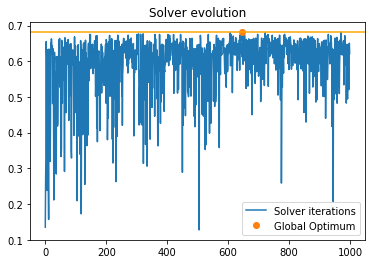

In [175]:
plt.plot([tpe_trials_conatiner[0].results[i]['loss']*-1 for i in range(0, 1000)])
x = tpe_trials_conatiner[0].best_trial['tid']
y = -tpe_trials_conatiner[0].best_trial['result']['loss']
plt.plot(x, y, 'o')
plt.axhline(y, c = "orange")
plt.title("Solver evolution")
plt.legend(['Solver iterations','Global Optimum'])
plt.show()

Orange horizontal line represents the global optimum, which was triggered by the solver after 646 trails. 

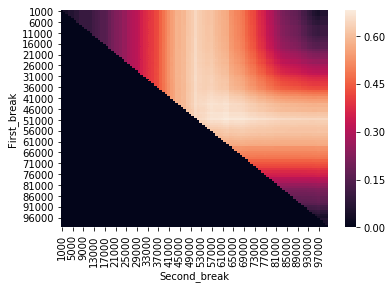

In [90]:
# Create heatmap of the CramerV'values and dimensions: First_break by Second_break
temp = pd.DataFrame(combo_matrix)
temp['First_break'] = (temp.index+1)*1000
temp = temp.set_index('First_break').transpose()
temp['Second_break']= (temp.index+1)*1000
temp = temp.set_index('Second_break').transpose()

ax = sns.heatmap(temp)

The optimal spliting pairs with the highest CramerV' values  can be found in the centre resp. leaving one splitting point quite centered.